# PART 2 Exploratory data analysis sur la colonne `day`

Cette partie est la suite de la partie une et effectue une analyse exploratoire sur la variable jour.

In [74]:
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import spacy
from urllib.parse import urlparse
import re
import regex
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.stem.snowball import SnowballStemmer
# !python -m spacy download fr_core_news_sm

from unidecode import unidecode
from nltk.corpus import stopwords


## Lecture des données

In [2]:
data = Path("../data/").glob("*.parquet") 
data = list(data)

[print(parquet.name) for parquet in data]

part-00000-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00001-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00002-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00003-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet
part-00004-1b8fcd71-6348-4510-a9dc-bdd7dcf82f2d-c000.snappy.parquet


[None, None, None, None, None]

In [75]:
df = pd.concat((pd.read_parquet(parquet, engine='fastparquet') for parquet in data))
df = df.reset_index(drop=True)

In [76]:
pd.set_option("max_colwidth", None)
df.head(15)

,url,target,day
0,https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html,"[1831, 1751, 1192, 745, 1703]",4
1,https://www.mystalk.net/profile/vitoriafcorrea,"[847, 978, 582, 1381, 529]",4
2,https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html,"[20, 1077, 294]",4
3,http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm,"[381, 935, 1343, 622, 933]",4
4,https://context.reverso.net/traduction/espagnol-francais/Para+ir,"[692, 1265, 725, 1264, 1266]",4
5,https://www.nordeclair.fr/700287/article/2020-01-25/roubaix-les-panneaux-solaires-installes-sur-la-mediatheque-n-etaient-pas,"[686, 501, 572, 1422, 5690]",4
6,https://www.750g.com/gateau-breton-de-mamie-scarlett-r70200.htm,"[1513, 907, 1573, 1526, 1556]",4
7,http://www.jeuxvideo.com/forums/1-18505-21783-1-0-1-0-duree-de-vie.htm,"[381, 925, 1343, 622, 1311]",4
8,https://www.lachainemeteo.com/meteo-france/ville-774900/previsions-meteo-tourtour-vendredi,"[63, 5692, 1254, 1119]",4
9,https://fr.shopping.rakuten.com/s/lauren+st+john,"[61, 353, 210, 531, 41]",4


In [5]:
print("Nombre d'exemples =",df.shape[0])
print("Numbre de colonnes  =",df.shape[1])
df.shape

Nombre d'exemples = 67595
Numbre de colonnes  = 3


(67595, 3)

#### Données manquantes:

In [6]:
missing_values_check = df.isnull().sum()
missing_values_check

url       0
target    0
day       0
dtype: int64

In [7]:
(df.url.values != '').sum()

67595

In [73]:
df.describe()

,day
count,67595.000000
mean,9.368089
std,5.134209
min,1.000000
25%,5.000000
50%,9.000000
75%,14.000000
max,19.000000


### Coder les targets

In [8]:
mlb = MultiLabelBinarizer()
targets_encoded = pd.DataFrame(mlb.fit_transform(df.target),
                   columns=mlb.classes_,
                   index=df.target.index)

In [9]:
targets_encoded

,100,1000,1001,1002,1003,1004,1005,1006,1007,1008,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print("Nombre d'exemples ",len(targets_encoded)) 
print("Nombre de colonnes: ",len(targets_encoded.columns))

Nombre d'exemples  67595
Nombre de colonnes:  1903


In [11]:
targets_decoded = mlb.inverse_transform(targets_encoded.values)
# targets_decoded

In [12]:
df_targets = pd.concat([df, targets_encoded], axis=1)
df_targets.head(5)

,url,target,day,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
0,https://www.cdiscount.com/bricolage/electricite/batterie-plomb-6v-4ah-ova51023e-pour-toplux/f-16614-ova2009927775303.html,"[1831, 1751, 1192, 745, 1703]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,https://www.mystalk.net/profile/vitoriafcorrea,"[847, 978, 582, 1381, 529]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,https://www.lequipe.fr/Tennis/TennisFicheJoueur1500000000003017.html,"[20, 1077, 294]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,http://m.jeuxvideo.com/forums/42-32625-60180057-1-0-1-0-la-guilde-fourmi-legionnaire-recrute.htm,"[381, 935, 1343, 622, 933]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,https://context.reverso.net/traduction/espagnol-francais/Para+ir,"[692, 1265, 725, 1264, 1266]",4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Nombre de jours

Text(0, 0.5, 'Total Number Of Days')

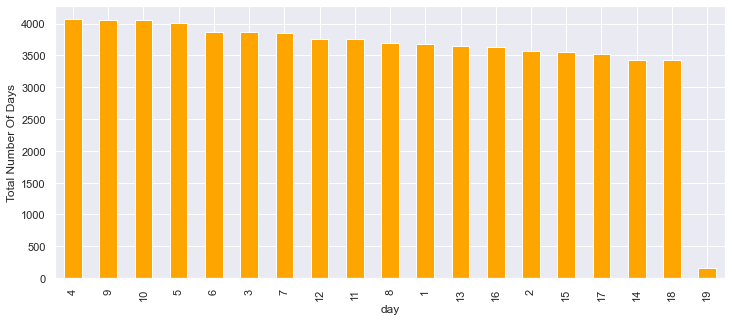

In [17]:
df_targets.day.value_counts().plot(figsize=(12,5),kind='bar',color='orange')
plt.xlabel('day')
plt.ylabel('Total Number Of Days')

### Combinaison de target par jour

In [187]:
test = df 
test["target"]= df["target"].map(tuple)
df.groupby(['target', 'day']).size()

target                         day
(100, 102, 191, 1033, 299)     5      1
(100, 1078, 549, 1271, 569)    6      1
(100, 1122, 1270, 1274, 1717)  4      1
(100, 1122, 1526, 1270, 1717)  17     1
(100, 1122, 191, 1270, 1717)   2      1
                                     ..
(997, 993, 992, 984, 983)      12     1
                               15     1
                               17     1
(997, 993, 992, 987, 365)      3      1
(999, 180, 1595, 554)          12     1
Length: 48851, dtype: int64

In [189]:
a = ['1867', '1722', '1367', '1721', '1370']
test = df[[set(a) == set(x) for x in df['target']]]
print(len(test))

293


In [190]:
test 

,url,target,day
224,https://www.conforama.fr/special/boutique/bout...,"(1867, 1722, 1367, 1721, 1370)",4
575,https://www.cdiscount.com/search/10/chauffeuse...,"(1867, 1722, 1367, 1721, 1370)",8
576,https://www.cdiscount.com/maison/fauteuil-pouf...,"(1867, 1722, 1367, 1721, 1370)",8
603,https://www.cdiscount.com/maison/canape-canape...,"(1867, 1722, 1367, 1721, 1370)",8
841,https://www.cdiscount.com/search/10/chaises+sc...,"(1867, 1722, 1367, 1721, 1370)",15
...,...,...,...
12897,https://www.cdiscount.com/maison/r-canape+conv...,"(1867, 1722, 1367, 1721, 1370)",17
12971,https://www.cdiscount.com/maison/canape-canape...,"(1867, 1722, 1367, 1721, 1370)",17
13003,https://www.cdiscount.com/maison/fauteuil-pouf...,"(1867, 1722, 1367, 1721, 1370)",17
13112,https://www.cdiscount.com/maison/fauteuil-pouf...,"(1867, 1722, 1367, 1721, 1370)",17


In [174]:
test.day.value_counts()

4     22
17    22
9     21
3     20
12    20
14    17
11    17
2     17
15    16
1     16
5     16
6     16
18    15
13    15
10    13
8     11
7     10
16     9
Name: day, dtype: int64

## target par jour

day 1  max target:  target    692
occ       199
Name: 501, dtype: int64
day 2  max target:  target    692
occ       225
Name: 501, dtype: int64
day 3  max target:  target    692
occ       285
Name: 501, dtype: int64
day 4  max target:  target    692
occ       295
Name: 501, dtype: int64
day 5  max target:  target    692
occ       279
Name: 501, dtype: int64
day 6  max target:  target    692
occ       283
Name: 501, dtype: int64
day 7  max target:  target    692
occ       260
Name: 501, dtype: int64
day 8  max target:  target    184
occ       204
Name: 108, dtype: int64
day 9  max target:  target    692
occ       254
Name: 501, dtype: int64
day 10  max target:  target    692
occ       275
Name: 501, dtype: int64
day 11  max target:  target    692
occ       244
Name: 501, dtype: int64
day 12  max target:  target    692
occ       268
Name: 501, dtype: int64
day 13  max target:  target    692
occ       234
Name: 501, dtype: int64
day 14  max target:  target    692
occ       211
Name: 501, 

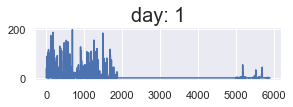

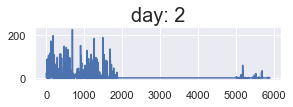

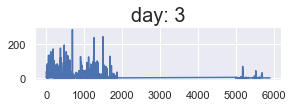

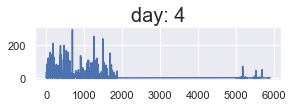

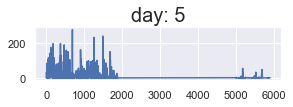

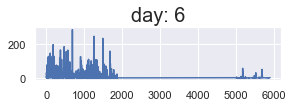

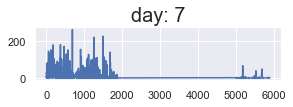

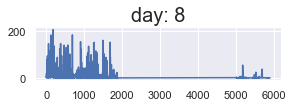

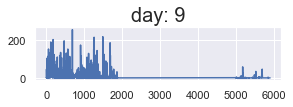

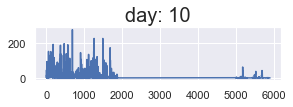

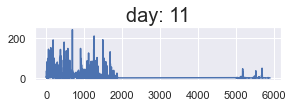

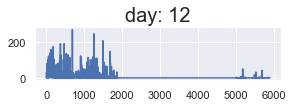

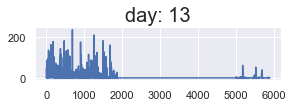

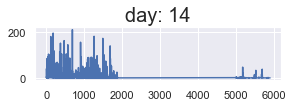

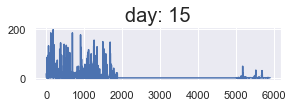

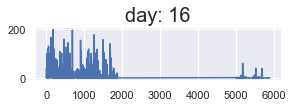

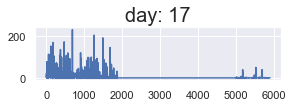

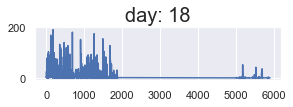

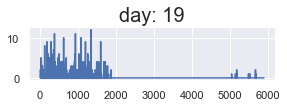

In [22]:
for i in range(1,20):
    
    subset = df_targets[df_targets.day==i]

    counts = []
    for target in targets:
        counts.append((target, subset[str(target)].sum()))
    subset_stats = pd.DataFrame(counts, columns=['target', 'occ'])
    print("day", i," max target: " ,subset_stats.loc[subset_stats['occ'].idxmax()])

    sns.set(font_scale = 1)
    plt.figure(figsize=(15,8))

    x = subset_stats.target
    y = subset_stats.occ

    plt.xlabel('targets')
    plt.ylabel('occurences')


    plt.subplot(7, 3, i)
    plt.title("day: "+str(i), fontsize=20)
    plt.plot(x, y)

plt.show()

#### Dans la partie 3, nous entrainerons nos modèles sur nos données puis nous essayerons d'améliorer les résultats avec du feature enginieering et en effectuant une gridsearch pour trouver les bons hyperparams